In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [12]:
df_ = pd.read_csv('Tweets.csv')
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
df = df_[['text', 'airline_sentiment']].copy()

In [14]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


<Axes: >

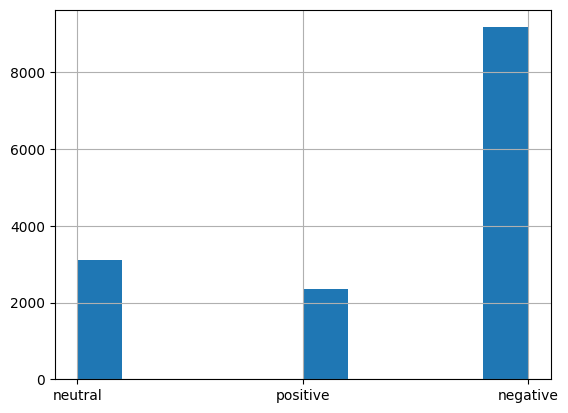

In [15]:
df['airline_sentiment'].hist()

In [16]:
target_map = {'positive' : 1, 'negative' : 0, 'neutral' : 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [17]:
df.head()

,text,airline_sentiment,target
0,@VirginAmerica What @dhepburn said.,neutral,2
1,@VirginAmerica plus you've added commercials t...,positive,1
2,@VirginAmerica I didn't today... Must mean I n...,neutral,2
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0


In [18]:
df_train, df_test = train_test_split(df)

In [19]:
df_train.head()

,text,airline_sentiment,target
1041,@united Change made in just over 3 hours. For ...,negative,0
1989,@united The engineer that designed the 787 doo...,negative,0
14309,"@AmericanAir 11 out of 11 delayed flights, you...",negative,0
1711,@united ouch not fair,negative,0
11542,@USAirways stuck in cae need reFlight Booking ...,negative,0


In [20]:
vectorizer = TfidfVectorizer(max_features=2000)


In [32]:
X_train = vectorizer.fit_transform(df_train['text'])

In [33]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 157851 stored elements and shape (10980, 2000)>

In [34]:
X_test = vectorizer.transform(df_test['text'])

In [35]:
Y_train = df_train['target']
Y_test = df_test['target']

In [36]:
Y_train = df_train['target']
Y_test = df_test['target']

In [37]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8549180327868853
Test acc: 0.7991803278688525


In [38]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9429477299894263
Test AUC: 0.8951758857131157


In [39]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
print("Train F1:", f1_score(Y_train, P_train, average='macro'))
print("Test F1:", f1_score(Y_test, P_test, average='macro'))

Train F1: 0.8021560234667325
Test F1: 0.7301791293334182


In [41]:
cm = confusion_matrix(Y_test, P_test, normalize='true')
cm

array([[0.93103448, 0.01702313, 0.05194238],
       [0.24369748, 0.63865546, 0.11764706],
       [0.41085271, 0.05684755, 0.53229974]])

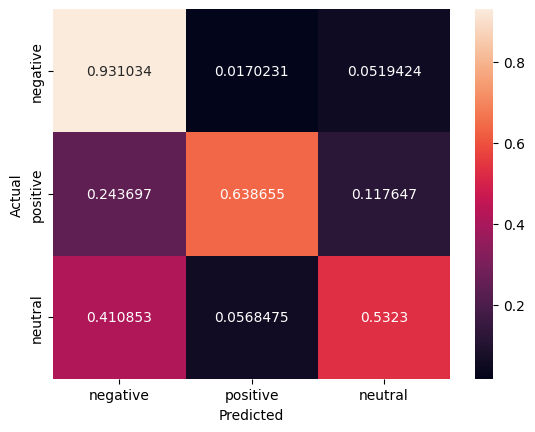

In [44]:
def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sns.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plot_cm(cm)

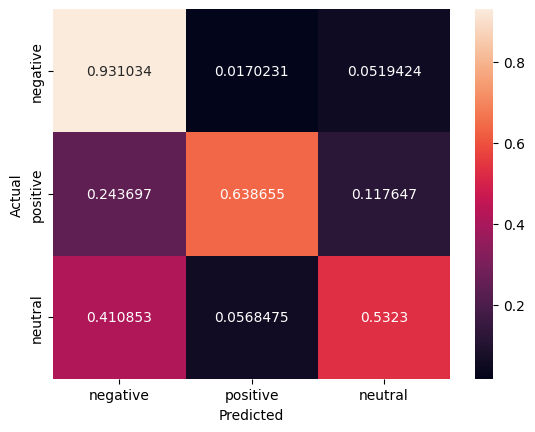

In [45]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [46]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [47]:
df_b_train.head()

,text,airline_sentiment,target
1041,@united Change made in just over 3 hours. For ...,negative,0
1989,@united The engineer that designed the 787 doo...,negative,0
14309,"@AmericanAir 11 out of 11 delayed flights, you...",negative,0
1711,@united ouch not fair,negative,0
11542,@USAirways stuck in cae need reFlight Booking ...,negative,0


In [52]:
df_b_train.tail()

,text,airline_sentiment,target
905,@united has made my no fly list. Other airline...,negative,0
5192,@SouthwestAir reservation (FEHQNE) 21FEB15 |...,negative,0
12172,@AmericanAir Thanks so much!,positive,1
235,@VirginAmerica I’m looking forward to watching...,positive,1
13349,@AmericanAir I've been in line for over half h...,negative,0


In [49]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [50]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [53]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.9298671288272675
Test acc: 0.9144144144144144


In [55]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9788541037708268
Test AUC: 0.953128610676047


In [56]:
model.coef_

array([[-0.24937201, -0.13313141, -0.34631635, ...,  0.5090778 ,
         0.0189375 , -0.60381769]], shape=(1, 2000))

(array([  2.,   0.,   2.,   3.,   3.,  14.,  25.,  61., 215., 818., 504.,
        208.,  82.,  36.,  10.,   2.,   2.,   6.,   1.,   0.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.20769842, -3.79381423, -3.37993003, -2.96604584, -2.55216164,
        -2.13827745, -1.72439325, -1.31050906, -0.89662486, -0.48274067,
        -0.06885647,  0.34502772,  0.75891192,  1.17279611,  1.58668031,
         2.0005645 ,  2.4144487 ,  2.82833289,  3.24221709,  3.65610128,
         4.06998548,  4.48386967,  4.89775387,  5.31163806,  5.72552226,
         6.13940645,  6.55329065,  6.96717484,  7.38105904,  7.79494323,
         8.20882743]),
 <BarContainer object of 30 artists>)

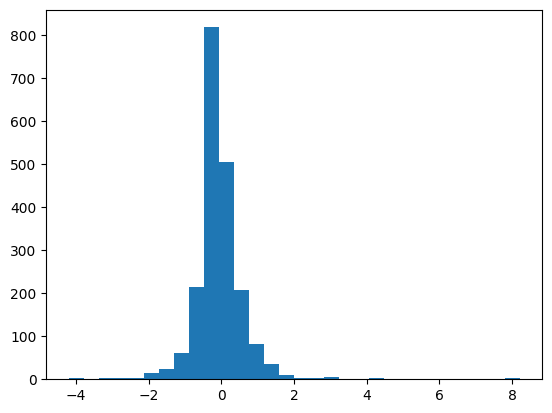

In [57]:
plt.hist(model.coef_[0], bins=30)

In [58]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': np.int64(1845),
 'change': np.int64(342),
 'made': np.int64(1093),
 'in': np.int64(943),
 'just': np.int64(994),
 'over': np.int64(1276),
 'hours': np.int64(907),
 'for': np.int64(755),
 'something': np.int64(1623),
 'that': np.int64(1729),
 'should': np.int64(1579),
 'have': np.int64(858),
 'taken': np.int64(1703),
 'online': np.int64(1250),
 'am': np.int64(138),
 'not': np.int64(1217),
 'loved': np.int64(1082),
 'the': np.int64(1731),
 'agent': np.int64(109),
 'though': np.int64(1747),
 'designed': np.int64(528),
 'door': np.int64(578),
 'to': np.int64(1767),
 'half': np.int64(836),
 'into': np.int64(969),
 'plane': np.int64(1336),
 'seat': np.int64(1539),
 'be': np.int64(237),
 'forced': np.int64(756),
 'always': np.int64(137),
 'sit': np.int64(1595),
 'here': np.int64(880),
 'americanair': np.int64(142),
 '11': np.int64(6),
 'out': np.int64(1271),
 'of': np.int64(1231),
 'delayed': np.int64(506),
 'flights': np.int64(738),
 'you': np.int64(1993),
 'suck': np.int64(1675),

In [62]:
threshold = 2
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

southwestair 2.898661161467998
thank 8.125361177220656
great 5.2020277475515195
best 3.6197415299237807
virginamerica 3.2086428740738633
thx 2.832698112584573
jetblue 2.904512838230986
good 3.239324031633926
thanks 8.208827427327787
love 4.3873994029269845
appreciate 2.9509137042593108
awesome 4.103465480704773
cool 2.153269984995275
kudos 2.6636846763129256
amazing 4.256967916677086
worries 2.7470157511175377
wonderful 2.1176255502923556


In [64]:
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

hours -3.1762048916439705
not -4.207698421785816
delayed -2.7228753939017194
hour -2.0608523611697476
but -2.214029030778168
cancelled -2.6626029520818997
nothing -2.1141693386791247
no -3.9393254484031575
worst -3.215049771271932
hold -2.7776660128436412
why -2.2183423630031203
doesn -2.039191264248877
luggage -2.1929999431056975
